<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Memprediksi Angka Penjualan Token <br><br> Berdasarkan persediaan dan Jumlah <br><br> Permintaan pada PT. PLN (Persero) Padang <br><br> Menggunakan Fuzzy Logic (Mamdani)
<br><br><br><br><br><br><br>
<br><strong>Oleh :
<br><br>
<br><strong>RM. Ardiansyah
<br><br>
<br><strong>09011281722048
<br><br><br><br><br><br><br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br><br><br><br>
<br><strong>Dosen Pengampuh : 
<br><br>
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br><br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><br>
<br><strong>Fakultas Ilmu Komputer
<br><br>
<br><strong>Universitas Sriwijaya
<br><br>
<br><strong>2019

Listrik merupakan kebutuhan mendasar untuk berbagai aktifitas manusia, yang kemudian digunakan untuk beragam fungsi kedepannya. Dalam mekanisme sekarang ini PT. PLN menerapkan sistem listrik pintar meteran prabayar (token). Dalam menentukan jumlah penjualan token  ini dikembangkan dengan menerapkan metode Fuzzy Mamdani. Tujuan yang dicapai adalah untuk memprediksi angka penjualan token berdasarkan data persediaan dan jumlah permintaan. Pada proses fuzzy, input dibagi menjadi 2 variabel yaitu persediaan dan permintaan. Himpunan fuzzy untuk output penjualan token yaitu rendah, sedang, dan tinggi. 

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# *Fuzzification*
### *Pada proses fuzzy, input dibagi menjadi 2 variabel dan 1 variabel out yaitu :*
1. Input    : Permintaan dan Persediaan
2. Output   : Penjualan

###  Variable fuzzy  :
Fungsi | Nama Variabel | Semesta Pembicara
--- | --- | ---
Input     | Permintaan     | [10 – 1100] 
Input     | Persediaan     | [1 – 3350]
Output    | Penjualaan     | [150 – 500]

In [11]:
# Generate universe variables
x_permintaan = np.arange(10, 1101, 1)
x_persediaan = np.arange(1, 3351, 1)
x_penjualan = np.arange(150, 501, 1)

### Tabel Himpunan Fuzzy Permintaan Untuk Input 1 :
| Variabel Himpunan | Range
|        ---        | ---
| Rendah     | 10 - 400
| Sedang     | 300 - 900
| Tinggi     | 500-1100

### Persamaan himpunan fuzzy untuk Permintaan : 

$µr(rendah) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } 10 ≤ a < 300  \\
       {400– a\over 100} & \mbox{; }  300 < a < 400  \\
       0 & \mbox{; } a ≥ 400 
    \end{array}
\right.$

$µs(sedang)= 
\left\{
    \begin{array}{ll}
       {a - 300 \over 100} & \mbox{; }  300 ≤ a ≤ 400  \\
       {900 – a  \over 500} & \mbox{; } 400 ≤ a ≤ 900   \\
       0 & \mbox{; } a ≤ 300 \ atau \ a ≥ 900  
    \end{array}
\right.$

$µr(tinggi)= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; }  a ≤ 500  \\
       { a – 500 \over 400} & \mbox{; }  500 < a < 900  \\
       1 & \mbox{; }  900 ≤ a ≤ 1100 
    \end{array}
\right.$

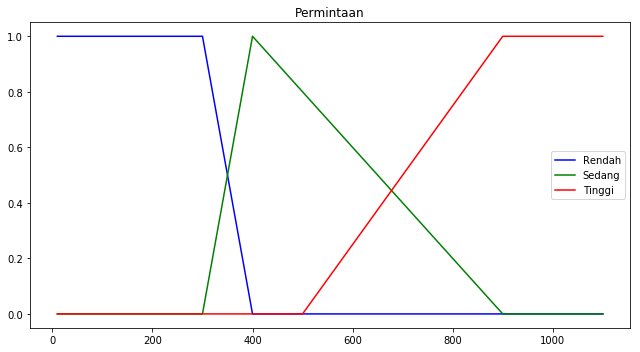

In [12]:
permintaan_lo = fuzz.trapmf(x_permintaan, [10, 10, 300, 400])
permintaan_md = fuzz.trimf(x_permintaan, [300, 400, 900])
permintaan_hi = fuzz.trapmf(x_permintaan, [500, 900, 1100, 1100])

fig, (ax0) = plt.subplots(nrows=1, figsize=(9, 5))
ax0.plot(x_permintaan, permintaan_lo, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_permintaan, permintaan_md, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_permintaan, permintaan_hi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title('Permintaan')
ax0.legend()
plt.tight_layout()


### Tabel Himpunan Fuzzy Persediaan untuk Input 2 :
| Variabel Himpunan | Range
|        ---        | ---
| Rendah     | o - 1100
| Sedang     | 350 - 2200 
| Tinggi     | 1400 - 3350 


### Persamaan himpunan fuzzy untuk Persediaan : 

$µr(rendah) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; }  0 ≤ b ≤ 350   \\
       {1100 – b\over 750} & \mbox{; }  350 < b < 1100   \\
       1 & \mbox{; } b ≥ 1100 
    \end{array}
\right.$

$µs(sedang)= 
\left\{
    \begin{array}{ll}
       {b - 350  \over 750} & \mbox{; } 350 ≤ b ≤ 1100   \\
       {2200 – b  \over 1100} & \mbox{; } 1100 ≤ b ≤ 2200    \\
       0 & \mbox{; }b ≤ 350 \   atau  \  b ≥ 2200  
    \end{array}
\right.$

$µr(tinggi) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } b ≤ 1400   \\
       { b – 1400 \over 800} & \mbox{; } 1400 < b < 2200   \\
       1 & \mbox{; }  2200 ≤ a ≤ 3350 
    \end{array}
\right.$

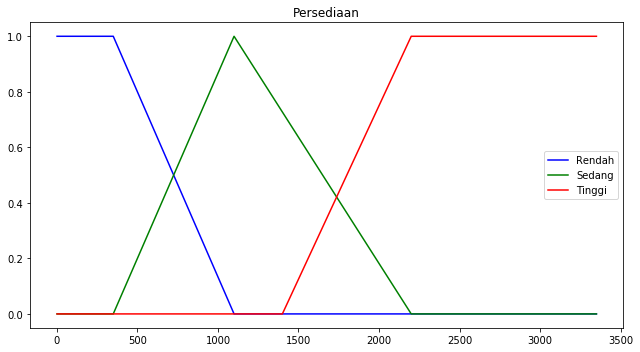

In [13]:
persediaan_lo = fuzz.trapmf(x_persediaan, [1, 1, 350, 1100])
persediaan_md = fuzz.trimf(x_persediaan, [350, 1100, 2200])
persediaan_hi = fuzz.trapmf(x_persediaan, [1400, 2200, 3350, 3350])

fig, (ax1) = plt.subplots(nrows=1, figsize=(9, 5))
ax1.plot(x_persediaan, persediaan_lo, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_persediaan, persediaan_md, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_persediaan, persediaan_hi, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Persediaan')
ax1.legend()
plt.tight_layout()

### Tabel Himpunan Fuzzy Penjualan untuk Output :
| Variabel Himpunan | Range
|        ---        | ---
| Rendah     | 150 - 280
| Sedang     | 260 - 390
| Tinggi     | 370 – 500 

### Persamaan himpunan fuzzy untuk Penjualan : 

$µr(rendah) = 
\left\{
    \begin{array}{ll}
       {280 – d \over 130} & \mbox{; }  3150 ≤ c ≤ 280   \\
       0 & \mbox{; }  c ≤ 280 
    \end{array}
\right.$

$µs(sedang)= 
\left\{
    \begin{array}{ll}
       {b - 350  \over 750} & \mbox{; } 350 ≤ b ≤ 1100   \\
       { d – 260   \over 20 } & \mbox{; }  260 ≤ c ≤ 280     \\
       0 & \mbox{; }d < 370  
    \end{array}
\right.$

$µr(tinggi) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; }c < 260 \ atau \ c > 390   \\
       { c – 370 \over 130} & \mbox{; }  3 370 ≤ d ≤ 500   \\
    \end{array}
\right.$

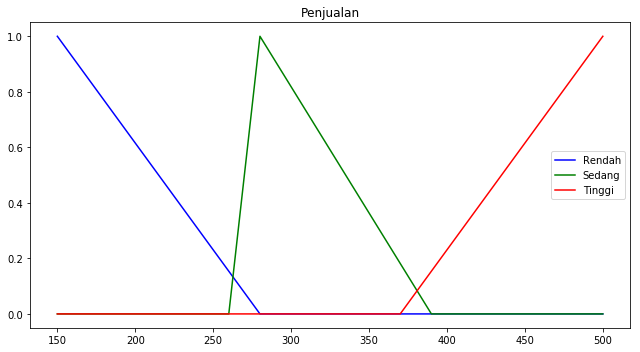

In [14]:
penjualan_lo = fuzz.trimf(x_penjualan, [150, 150, 280])
penjualan_md = fuzz.trimf(x_penjualan, [260, 280, 390])
penjualan_hi = fuzz.trimf(x_penjualan, [370, 500, 500])

fig, (ax2) = plt.subplots(nrows=1, figsize=(9, 5))
ax2.plot(x_penjualan, penjualan_lo, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_penjualan, penjualan_md, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_penjualan, penjualan_hi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Penjualan')
ax2.legend()
plt.tight_layout()

# Rule Base 

Dari dua input dan satu output fuzzy tersebut. Rule yang diperoleh ada 9 rule, yang ditetapkan berdasarkan input dan output. 

### Tabel Rule :
NO | Permintaan | Persediaan | Penjualan
--- | --- | --- | ---
1  | Rendah     | Tinggi     | Rendah
2  | Rendah     | Sedang     | Rendah
3  | Rendah     | Rendah     | Rendah
4  | Sedang     | Tinggi     | Sedang
5  | Sedang     | Sedang     | Sedang
6  | Sedang     | Rendah     | Tinggi
7  | Tinggi     | Tinggi     | Tinggi
8  | Tinggi     | Sedang     | Tinggi
9  | Tinggi     | Rendah     | Tinggi

## Contoh Kasus
Misalkan kita memasukkan nilai 504 untuk permintaan, serta nilai 376 untuk persediaan maka penjualan tersebut tergolong dalam kategori rendah, sedang, atau tinggi?
Pengolahan data menggunakan fuzzy manual bertujuan dapat memberikan penjelasan tentang kerja aplikasi yang digunakan. Adapun langkah – langkah dalam pengolahan data untuk menentukan Penjualan sebagai berikut :<br><br> Menentukan Himpunan Fuzzy <br>Variabel Permintaan telah didefinisikan pada tiga himpuan fuzzy, yaitu: rendah, sedang dan tinggi. Permintaan 504 bh termasuk kedalam himpunan fuzzy rendah, sedang dan tinggi maka  tingkat keanggotaan sesuai fungsi berikut:<br> a. Himpunan Fuzzy Permintaan rendah (504) = 400 – 504 / 100 = 0.0 <br> b. Himpunan Fuzzy Permintaan sedang (504) = 900 – 504 / 500 = 0,80. <br>c. Himpunan Fuzzy Permintaan tinggi (504) = 504 – 400 / 500 =  0,20 <br>Variabel permintaan telah didefinisikan pada tiga himpuan fuzzy, yaitu:  rendah, sedang dan tinggi.  <br><br>Variabel persediaan telah didefinisikan pada tiga himpuan fuzzy, yaitu:  rendah, sedang dan tinggi.<br> Persediaan 376 bh termasuk kedalam himpunan fuzzy rendah maka tingkat keanggotaan sesuai fungsi berikut: <br>a. Himpunan Fuzzy Persediaan rendah (376)   = 1100 – 376 / 750 = 0,96   <br> b. Himpunan Fuzzy Persediaan sedang (376) = 2200 – 376 / 1000 = 1,82 <br> c. Himpunan Fuzzy Persediaan tinggi (376)  = 376 – 1400 / 1000 = 0,0.<br> Variabel persediaan telah didefinisikan pada tiga himpuan fuzzy, yaitu:  rendah, sedang dan tinggi.  

# Fuzzy Inference

Tahap dari proses perhitungan fuzzy berikutnya adalah tahapan penalaran. Dalam proses penalaran ada 3 hal yang dilakukan yaitu mengaplikasi operator fuzzy, metode implikasi dan komposisi. Dari 9 rule yang ada, rule fuzzy yang akan ditampilkan hanya 5 aturan saja,yaitu  (Rule 4), (Rule 5), (Rule 7), (rule 8), dan (Rule 9). Proses rule dapat dilihat sebagai berikut : 

[Rule 4] If (Permintaan is sedang) and (Persediaan is tinggi) then (Penjualan is sedang) Operator yang digunakan adalah AND, sehingga : α4 = min (µpermintaan [504], µpersediaan[376]) = min (0,80 ; 0,0)  = 0,0 <br><br>
[Rule 5] If (Permintaan is sedang) and (Persediaan is sedang) then (Penjualan is sedang) Operator yang digunakan adalah AND, sehingga : α5 = min (µpermintaan [504], µpersediaan[376])  = min (0,80 ; 1,82)  = 0,80 <br><br>
[Rule 7] If (Permintaan is tinggi) and (Persediaan is tinggi) then (Penjualan is tinggi) Operator yang digunakan adalah AND, sehingga : α7 = min (µpermintaan [504], µpersediaan[376])  = min (0,20 ; 0,0)  = 0,0 <br><br>
[Rule 8] If (Permintaan is tinggi) and (Persediaan is sedang)  then (Penjualan is tinggi) Operator yang digunakan adalah AND, sehingga : α8 = min (µpermintaan [504], µpersediaan[376])  = min (0,20 ; 1,82)  = 0,20 <br><br>
[Rule 9] If (Permintaan is tinggi) and (Persediaan is rendah)  then (Penjualan is tinggi) Operator yang digunakan adalah AND, sehingga : α9 = min (µpermintaan [504], µpersediaan[376])  = min (0,20 ; 0,96)  = 0,20 
 

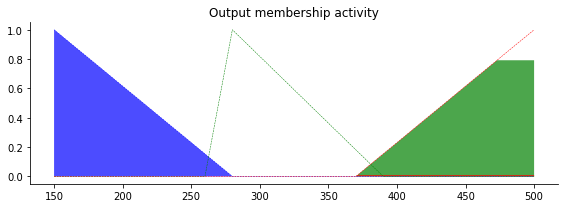

In [15]:
permintaan_level_lo = fuzz.interp_membership(x_permintaan, permintaan_lo, 504)
permintaan_level_md = fuzz.interp_membership(x_permintaan, permintaan_md, 504)
permintaan_level_hi = fuzz.interp_membership(x_permintaan, permintaan_hi, 504)

persediaan_level_lo = fuzz.interp_membership(x_persediaan, persediaan_lo, 376)
persediaan_level_md = fuzz.interp_membership(x_persediaan, persediaan_md, 376)
persediaan_level_hi = fuzz.interp_membership(x_persediaan, persediaan_hi, 376)

rule1 = np.fmin(permintaan_level_lo, persediaan_level_hi)
rule2 = np.fmin(permintaan_level_lo, persediaan_level_md)
rule3 = np.fmin(permintaan_level_lo, persediaan_level_lo)
rule4 = np.fmin(permintaan_level_md, persediaan_level_hi)
rule5 = np.fmin(permintaan_level_md, persediaan_level_md)
rule6 = np.fmin(permintaan_level_md, persediaan_level_lo)
rule7 = np.fmin(permintaan_level_hi, persediaan_level_hi)
rule8 = np.fmin(permintaan_level_hi, persediaan_level_md)
rule9 = np.fmin(permintaan_level_hi, persediaan_level_lo)

penjualan_activation_lo = np.fmin(rule1, penjualan_lo)
penjualan_activation_lo = np.fmin(rule2, penjualan_lo)
penjualan_activation_lo = np.fmax(rule3, penjualan_lo)
penjualan_activation_md = np.fmin(rule4, penjualan_md)
penjualan_activation_md = np.fmin(rule5, penjualan_md)
penjualan_activation_md = np.fmin(rule6, penjualan_hi)
penjualan_activation_hi = np.fmin(rule7, penjualan_hi)
penjualan_activation_hi = np.fmin(rule8, penjualan_hi)
penjualan_activation_hi = np.fmin(rule9, penjualan_hi)
penjualan0 = np.zeros_like(x_penjualan)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_penjualan, penjualan0, penjualan_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_penjualan, penjualan_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_penjualan, penjualan0, penjualan_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_penjualan, penjualan_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_penjualan, penjualan0, penjualan_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_penjualan, penjualan_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')


for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Defuzzifikasi
Langkah terakhir dalam proses ini adalah defuzzifikasi atau disebut juga tahap  penegasan.Metode yang digunakan adalah metode centroid. Berikut ini mengubah himpunan fuzzy menjadi bilangan real :

[ Rule 4 ] µPenjualan sedang (x) = 0,0, maka nilai x adalah ;<br> Penjualan (sedang)  = (x - 260) / 20 = 0,0<br>        = (0,80 x 20) + 260            = 260<br><br>
[ Rule 5 ]  µPenjualan sedang (x) = 0,80, maka nilai x adalah ;<br> Penjualan (sedang)       = (x - 260) / 20 = 0,80<br>         = (0,80 x 20) + 260             = 276 <br><br>
[ Rule  7]  µPenjualan tinggi (x) = 0,0, maka nilai x adalah ;<br> Penjualan (tinggi) = (x - 370) / 220 = 0,0 <br>   = (0,0 x 220) + 370    = 370 <br><br>
[ Rule  8]  µPenjualanµ tinggi (x) = 0,20, maka nilai x adalah ; <br>Penjualan (tinggi)   = ( x - 370) / 220 = 0,20    <br> = (0,20 x 220) + 370    = 414 <br><br>
[ Rule  9]  µPenjualanµ tinggi (x) = 0,20, maka nilai x adalah ; <br>Penjualan (tinggi)   = ( x - 370) / 220 = 0,20    <br> = (0,20 x 220) + 370    = 414 <br>
 

Maka, dengan menggunakan metode defuzzy weighted average diperoleh nilai angka penjualan  adalah: 

$Z1 =
\left\{
    \begin{array}{ll}
       {( (0,0*260)+ (0,80*276) + (0,0*370) +(0,20*414) + (0,20*414) ) \over (0,0+ 0,80+ 0,0 + 0,20 + 0,20)} = 322,5 \\
    \end{array}
\right.$
    

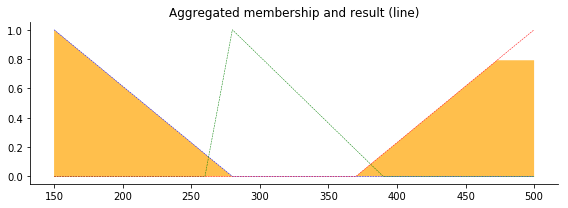

In [16]:
aggregated = np.fmax(penjualan_activation_lo,
                     np.fmax(penjualan_activation_md, penjualan_activation_hi))

penjualan = fuzz.defuzz(x_penjualan, aggregated, 'centroid')
penjualan_activation = fuzz.interp_membership(x_penjualan, aggregated, penjualan)  

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_penjualan, penjualan_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_penjualan, penjualan_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_penjualan, penjualan_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_penjualan, penjualan0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([penjualan, penjualan], [0, penjualan_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [17]:
penjualan

321.3298109799366